In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
dataset = pd.read_csv("winedata.txt",header=None)

In [128]:
dataset.shape

(178, 14)

In [126]:
columns=['class','Alcohol','Malic acid','Ash','Alcalinity of ash' , 'Magnesium','Total phenols','Flavanoids'
         ,'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']           


In [130]:
dataset.columns=columns

In [131]:
dataset.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [132]:
len(columns)

14

In [133]:
X = dataset.iloc[:, 1:14].values # independent variable 
y = dataset.iloc[:,0].values# dependendent 

# df.values -- It will change your dataframe to array

In [134]:
dataset['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [138]:
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [136]:
X.shape

(178, 13)

In [139]:
#Importing PCA libratry from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 13)
X = pca.fit_transform(X)

In [32]:
X.shape

(178, 13)

In [140]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [141]:
explained_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0, 0.5, 'Cumulative_SUM')

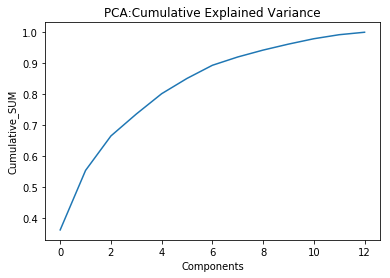

In [142]:
#Plotting the cumulative explained variance
plt.plot(explained_variance)
plt.title("PCA:Cumulative Explained Variance")
plt.xlabel("Components")
plt.ylabel("Cumulative_SUM")

In [143]:
sum(pca.explained_variance_ratio_)

1.0

In [144]:
var_ratio={}
for n in range(2,14):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(X)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [145]:
var_ratio

{2: 0.5540633835693527,
 3: 0.6652996889318523,
 4: 0.7359899907589927,
 5: 0.8016229275554787,
 6: 0.8509811607477045,
 7: 0.8933679539739376,
 8: 0.9201754434577264,
 9: 0.9423969775056235,
 10: 0.9616971684450643,
 11: 0.9790655253449634,
 12: 0.9920478511010055,
 13: 1.0}

In [146]:
pc=PCA(n_components=7)

In [147]:
p=pc.fit(X)

In [148]:
X.shape

(178, 13)

In [149]:
p.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147])

In [151]:
#Since 7 components are explaining about 90% variance so we select 7 components
pc_final=PCA(n_components=7).fit(X)
reduced_cr=pc_final.fit_transform(X)

In [152]:
dd=pd.DataFrame(reduced_cr)

In [153]:
dd.head()

,0,1,2,3,4,5,6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074


In [155]:
dd.shape

(178, 7)

In [156]:
col_list=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']

In [157]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(7)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
Alcohol,1.0,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
Malic acid,0.0,1.000000e+00,-4.935223e-16,-2.528192e-17,-2.259960e-16,-8.364381e-17,-1.914102e-17
Ash,-0.0,6.042599e-16,1.000000e+00,9.600697e-16,-8.448098e-17,-2.814039e-16,7.769145e-17
Alcalinity of ash,-0.0,1.170164e-16,-7.639174e-16,1.000000e+00,-2.485225e-14,-4.252880e-16,-2.805881e-16
Magnesium,-0.0,1.617713e-16,3.490856e-16,2.454985e-14,1.000000e+00,-5.226473e-16,9.864563e-16
Total phenols,-0.0,4.914835e-17,3.998416e-16,5.194499e-16,5.885917e-16,1.000000e+00,-2.716442e-15
Flavanoids,-0.0,1.937487e-17,-7.356533e-17,2.599764e-16,-1.012650e-15,2.728172e-15,1.000000e+00
Nonflavanoid phenols,-0.0,2.046168e-16,3.645570e-16,-3.765151e-16,-6.078014e-17,3.856159e-16,-1.451336e-16
Proanthocyanins,-0.0,2.890462e-17,-4.978845e-17,-1.310554e-16,-2.354733e-16,-2.691041e-16,5.048113e-16
Color intensity,-0.0,-6.795263e-18,3.454244e-17,-1.132012e-16,-5.220240e-17,6.350651e-17,1.034126e-14


In [158]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(7)])

PC_0    0.361988
PC_1    0.192075
PC_2    0.111236
PC_3    0.070690
PC_4    0.065633
PC_5    0.049358
PC_6    0.042387
dtype: float64

In [159]:
type(cr_pca)

sklearn.decomposition.pca.PCA

In [160]:
from sklearn.cluster import KMeans

In [175]:
km_4=KMeans(n_clusters=3,random_state=123)

In [163]:

reduced_cr.shape

(178, 7)

In [176]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [177]:
km_4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [166]:
pd.Series(km_4.labels_).value_counts()

2    56
0    49
3    45
1    28
dtype: int64

In [167]:
# CLuster Error
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )

In [168]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,2067.253445
1,2,1412.494053
2,3,1032.405560
3,4,932.716207
4,5,860.608761
5,6,803.094697
6,7,747.776017
7,8,707.378045
8,9,654.754197
9,10,623.844467


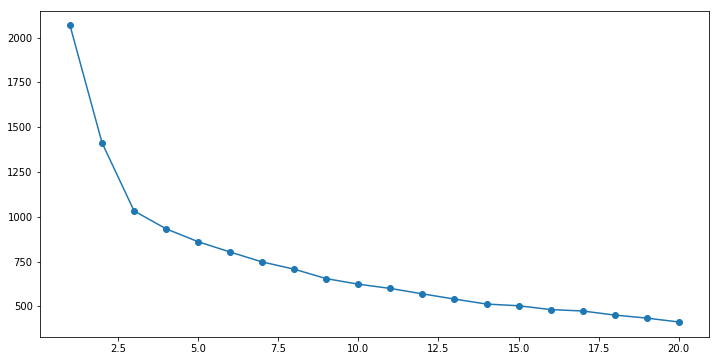

In [169]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [170]:
#Silhouette Coefficient
from sklearn import metrics
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

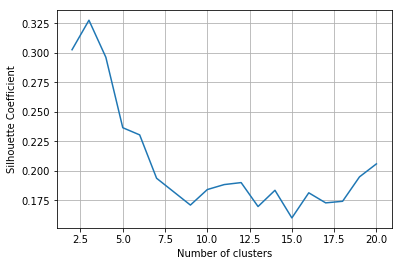

In [171]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

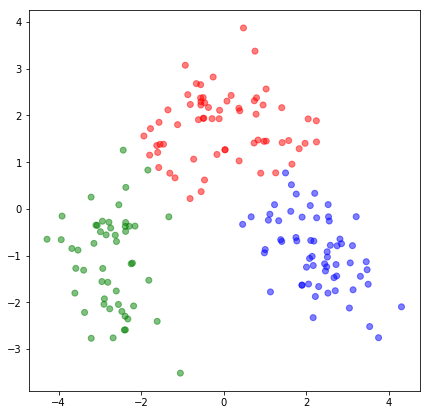

In [178]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

FACTOR ANALYSIS 

In [37]:
from factor_analyzer import FactorAnalyzer

ModuleNotFoundError: No module named 'factor_analyzer'

In [38]:
!pip install factor_analyzer

  Stored in directory: C:\Users\gaura\AppData\Local\pip\Cache\wheels\4a\d0\57\f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [179]:
from factor_analyzer import FactorAnalyzer

In [180]:
df= pd.read_csv("resturant.csv")

In [181]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [182]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [183]:
df.drop(['gender', 'education', 'age','Unnamed: 0'],axis=1,inplace=True)

In [184]:
df.dropna(inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
A1    2436 non-null float64
A2    2436 non-null float64
A3    2436 non-null float64
A4    2436 non-null float64
A5    2436 non-null float64
C1    2436 non-null float64
C2    2436 non-null float64
C3    2436 non-null float64
C4    2436 non-null float64
C5    2436 non-null float64
E1    2436 non-null float64
E2    2436 non-null float64
E3    2436 non-null float64
E4    2436 non-null float64
E5    2436 non-null float64
N1    2436 non-null float64
N2    2436 non-null float64
N3    2436 non-null float64
N4    2436 non-null float64
N5    2436 non-null float64
O1    2436 non-null float64
O2    2436 non-null int64
O3    2436 non-null float64
O4    2436 non-null float64
O5    2436 non-null float64
dtypes: float64(24), int64(1)
memory usage: 494.8 KB


In [186]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [188]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity # Similarity between sparse data
chi_square_value,p_value=calculate_bartlett_sphericity(df) 
chi_square_value, p_value
# If p-value higher than .5 no correlation in dataset

(18170.966350869236, 0.0)

In [189]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None,n_factors=25)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev # Take variable whose eigen value is grater than 1 

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

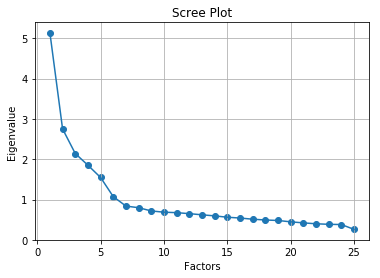

In [190]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [191]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer( n_factors=6, rotation="varimax") # rotation="varimax" it increases the weight of few value in variable of same class
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=6, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [192]:
x=pd.DataFrame(fa.loadings_)
x.columns=['Factor_'+str(i) for i in range(1,7)]

In [193]:
pd.concat([pd.DataFrame(df.columns),x],axis=1).to_csv("results.csv")

In [195]:
# Forward Eliminataion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [194]:
X= dataset.iloc[:, 1:14].values # divide the column
y=dataset.iloc[:,0].values

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.30, random_state=42)# divide data rowwise

In [197]:
y_train = y_train.ravel() # return 1D array
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (124, 13) (124,)
Testing dataset shape: (54, 13) (54,)


In [200]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf, k_features=10,forward=True,floating=False, verbose=2,scoring='accuracy', cv=2)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    7.2s finished

[2019-12-19 17:02:30] Features: 1/10 -- score: 0.7338709677419355[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.6s finished

[2019-12-19 17:02:37] Features: 2/10 -- score: 0.935483870967742[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.9s finished

[2019-12-19 17:02:43] Features: 3/10 -- score: 0.9516129032258065[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [201]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 6, 8, 9, 10, 11]
